In [36]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
from nltk.tokenize import RegexpTokenizer
import numpy as np


from pymystem3 import Mystem


from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace


# сравню частотность слов в сгенерированном и орининальном датасетах

In [6]:
def draw_ward_frequency(texts, ylim=200, k=10, dataset_name='сгенерированном/оригинальном'):
    full_text = ' '.join(texts)

    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(full_text)
    print(f'текстов в датасете: {len(texts)}')
    print(f'всего слов: {len(tokens)}')
    print(f'среди них уникальных {len(set(tokens))}')
    
    counter = Counter(tokens)
    words_cou = sorted(i[1] for i in counter.items())
    
    ind_k = -1
    for i, v in enumerate(words_cou):
        if v >= k:
            ind_k = i
            break
            
    
    
    plt.figure(figsize=(16, 9))
    plt.ylim((0, ylim))
    plt.xlim((0, len(words_cou)))
    
    plt.plot(words_cou, linewidth=2, label='частотное распределение слов')
    
    
    plt.axvline(x=ind_k, linestyle='--', color='purple', linewidth=2, alpha=0.3)
    plt.axhline(y=words_cou[ind_k], linestyle='--', color='purple', linewidth=2, alpha=0.3)
    
    
    plt.scatter(ind_k, words_cou[ind_k], color='r', s=100, zorder=5)
    
    plt.text(ind_k + 100, 2, f'{ind_k}', color='purple',)
    plt.text(100, words_cou[ind_k] + 5 , f'{k}', color='purple',)
    
    plt.xlabel('количество слов')
    plt.ylabel('частота слов')
    
    
    
    plt.title(f'в {dataset_name} датасете не менее {k} раз встречается {len(words_cou) - ind_k} ~ {(len(words_cou) - ind_k) / len(words_cou) * 100:.2f}% слов')
    plt.legend()
    plt.show()


## сгенерированный датасет

In [12]:
with open('dataset/generated/generated_pushkin.txt', 'r', encoding='utf-8') as f:
    texts = f.read().replace('\n', '').split('#' * 10)

with open('dataset/generated/generated_curious_pushkin.txt', 'r', encoding='utf-8') as f:
    texts += f.read().replace('\n', '').split('#' * 10)

текстов в датасете: 5687
всего слов: 2658617
среди них уникальных 109282


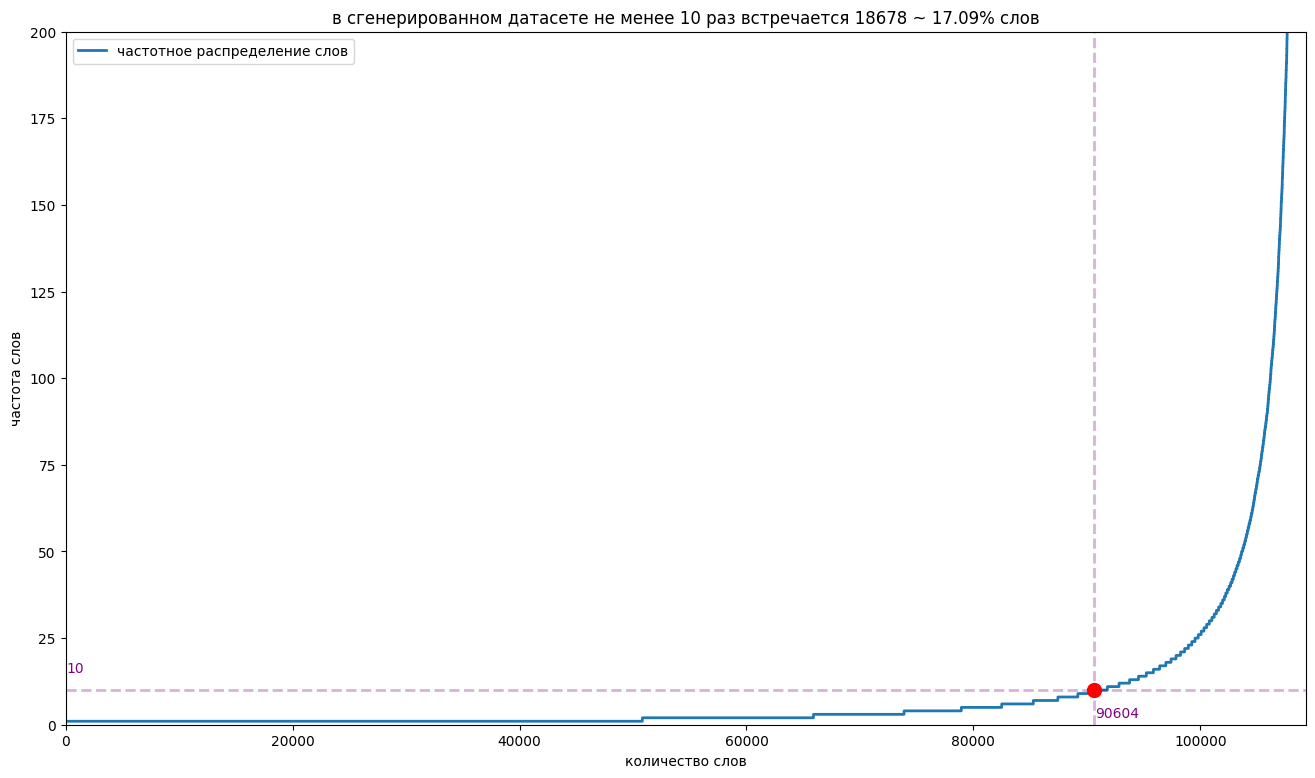

In [13]:
draw_ward_frequency(texts=texts, ylim=200, k=10, dataset_name='сгенерированном')

## оригинальный датасет - тексты Пушкина

In [14]:
with open('dataset/pushkin/full.txt', 'r', encoding='utf-8') as f:
    texts = f.read().replace('\n', '').split('#' * 10)


текстов в датасете: 1
всего слов: 1005075
среди них уникальных 99431


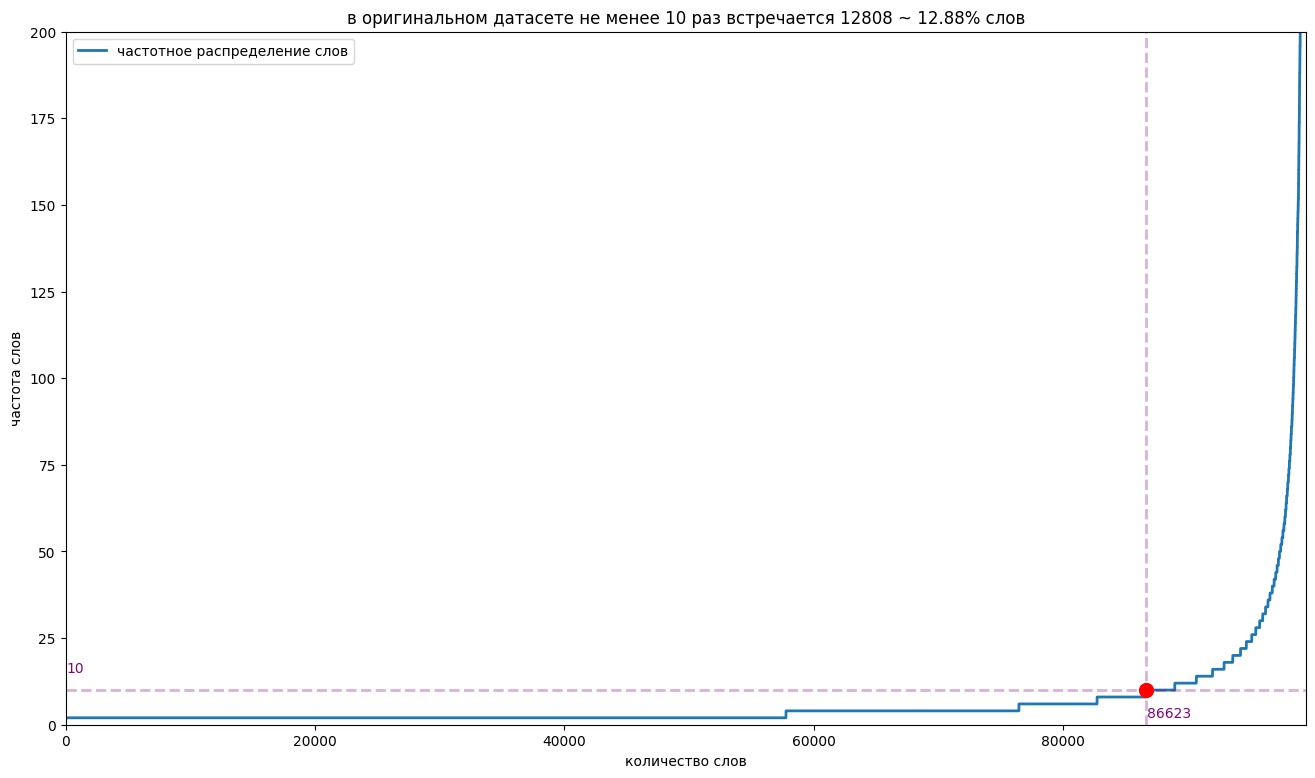

In [15]:
draw_ward_frequency(texts=list(texts), ylim=200, k=10, dataset_name='оригинальном')

# лемматизирую оба датасета и сравню частотность лемм в обоих датасетах для сравнения словарного запаса

In [31]:
def draw_lemms_frequency(texts, ylim=200, k=10, dataset_name='сгенерированном/оригинальном'):
    full_text = ' '.join(texts)
    mystem = Mystem()
    lemms = mystem.lemmatize(full_text)

    print(f'текстов в датасете: {len(texts)}')
    print(f'всего лемм: {len(lemms)}')
    print(f'среди них уникальных {len(set(lemms))}')
    
    counter = Counter(lemms)
    words_cou = sorted(i[1] for i in counter.items())
    
    ind_k = -1
    for i, v in enumerate(words_cou):
        if v >= k:
            ind_k = i
            break
            
    
    
    plt.figure(figsize=(16, 9))
    plt.ylim((0, ylim))
    plt.xlim((0, len(words_cou)))
    
    plt.plot(words_cou, linewidth=2, label='частотное распределение лемм')
    
    
    plt.axvline(x=ind_k, linestyle='--', color='purple', linewidth=2, alpha=0.3)
    plt.axhline(y=words_cou[ind_k], linestyle='--', color='purple', linewidth=2, alpha=0.3)
    
    
    plt.scatter(ind_k, words_cou[ind_k], color='r', s=100, zorder=5)
    
    plt.text(ind_k + 100, 2, f'{ind_k}', color='purple',)
    plt.text(100, words_cou[ind_k] + 5 , f'{k}', color='purple',)
    
    plt.xlabel('количество лемм')
    plt.ylabel('частота лемм')
    
    
    
    plt.title(f'в {dataset_name} датасете не менее {k} раз встречается {len(words_cou) - ind_k} ~ {(len(words_cou) - ind_k) / len(words_cou) * 100:.2f}% лемм')
    plt.legend()
    plt.show()

## сгенерированный датасет

In [32]:
with open('dataset/generated/generated_pushkin.txt', 'r', encoding='utf-8') as f:
    texts = f.read().replace('\n', '').split('#' * 10)

with open('dataset/generated/generated_curious_pushkin.txt', 'r', encoding='utf-8') as f:
    texts += f.read().replace('\n', '').split('#' * 10)

текстов в датасете: 5687
всего лемм: 5451275
среди них уникальных 33464


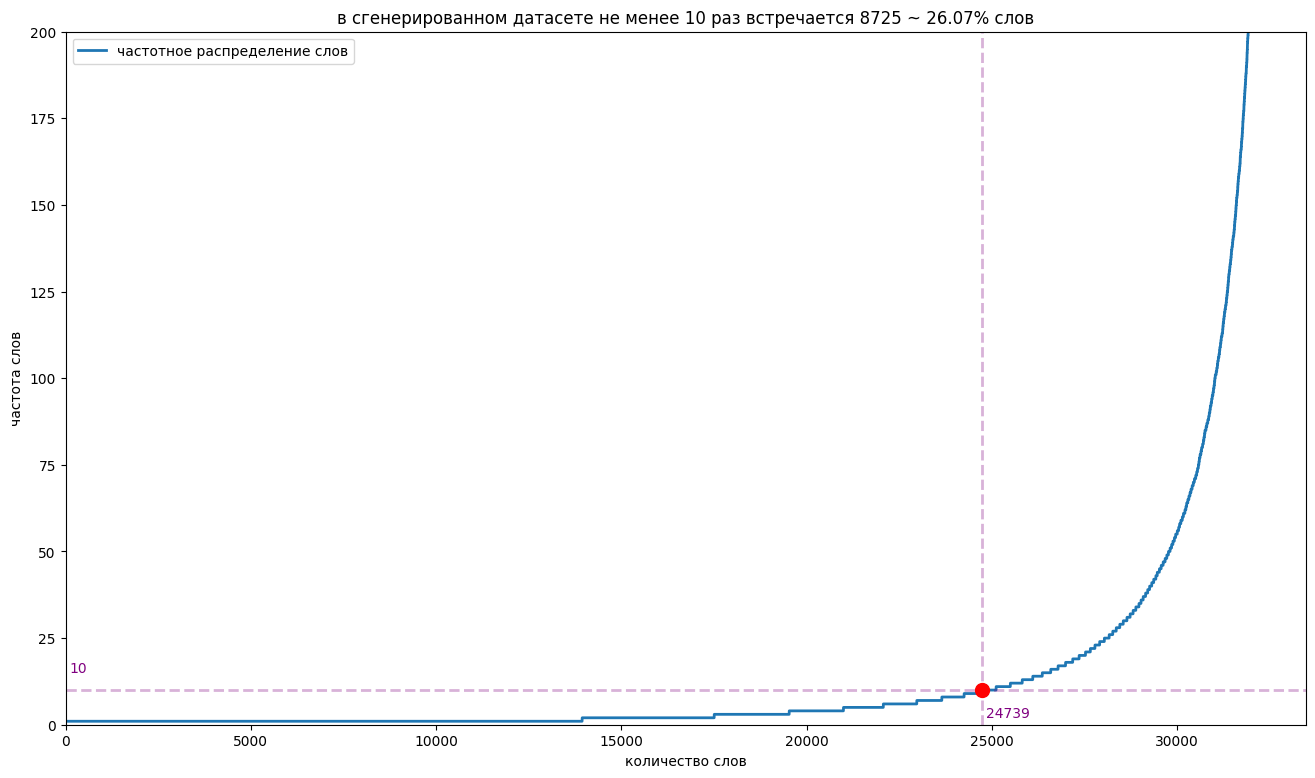

In [33]:
draw_lemms_frequency(texts, ylim=200, k=10, dataset_name='сгенерированном')

## оригинальный датасет - тексты Пушкина

In [34]:
with open('dataset/pushkin/full.txt', 'r', encoding='utf-8') as f:
    texts = f.read().replace('\n', '').split('#' * 10)


текстов в датасете: 1
всего лемм: 2033762
среди них уникальных 54548


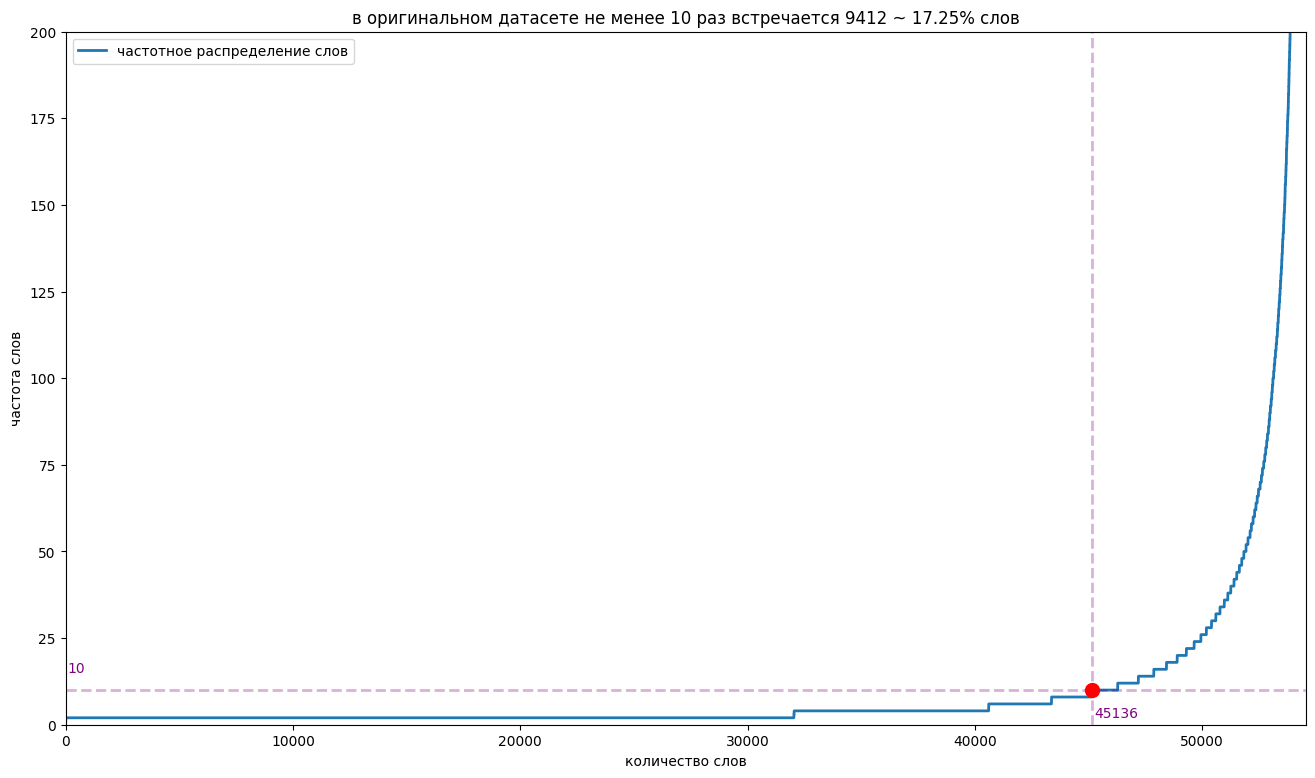

In [35]:
draw_lemms_frequency(texts=list(texts), ylim=200, k=10, dataset_name='оригинальном')

что можно интересного из этого сказать? - В сгенерированном датасете примерно в два раза меньше уникальных слов, чем в оригинальном. Значит на нем модель обучится лучше

# токенезирую оба датасета и сравню частотность токенов в обоих датасетах

In [70]:
def draw_tokens_frequency(paths, vocab_size=1000, ylim=200, k=10, dataset_name='сгенерированном/оригинальном'):
    
    tokenizer = Tokenizer(BPE(unk_token='<unk>'))
    trainer = BpeTrainer(vocab_size=vocab_size, min_frequency=1000, special_tokens=['<unk>', '<bos>', '<eos>', '<pad>'])
    tokenizer.pre_tokenizer = Whitespace()
    tokenizer.train(paths, trainer)

    tokens = []
    for path in paths:
        with open(path, 'r', encoding='utf-8') as f:
            tokens += tokenizer.encode(f.read()).tokens


    print(f'всего токенов: {len(tokens)}')
    print(f'среди них уникальных {len(set(tokens))}')
    
    counter = Counter(tokens)
    words_cou = sorted(i[1] for i in counter.items())
    
    ind_k = -1
    for i, v in enumerate(words_cou):
        if v >= k:
            ind_k = i
            break
            
    
    
    plt.figure(figsize=(16, 9))
    plt.ylim((0, ylim))
    plt.xlim((0, len(words_cou)))
    
    plt.plot(words_cou, linewidth=2, label='частотное распределение токенов')
    
    
    plt.axvline(x=ind_k, linestyle='--', color='purple', linewidth=2, alpha=0.3)
    plt.axhline(y=words_cou[ind_k], linestyle='--', color='purple', linewidth=2, alpha=0.3)
    
    
    plt.scatter(ind_k, words_cou[ind_k], color='r', s=100, zorder=5)
    
    plt.xlabel('количество слов')
    plt.ylabel('частота слов')
    
    
    
    plt.title(f'Размер словаря: {vocab_size}. В {dataset_name} датасете не менее {k} раз встречается {len(words_cou) - ind_k} ~ {(len(words_cou) - ind_k) / len(words_cou) * 100:.2f}% токенов')
    plt.legend()
    plt.show()

## сгенерированный датасет

всего токенов: 5979731
среди них уникальных 991


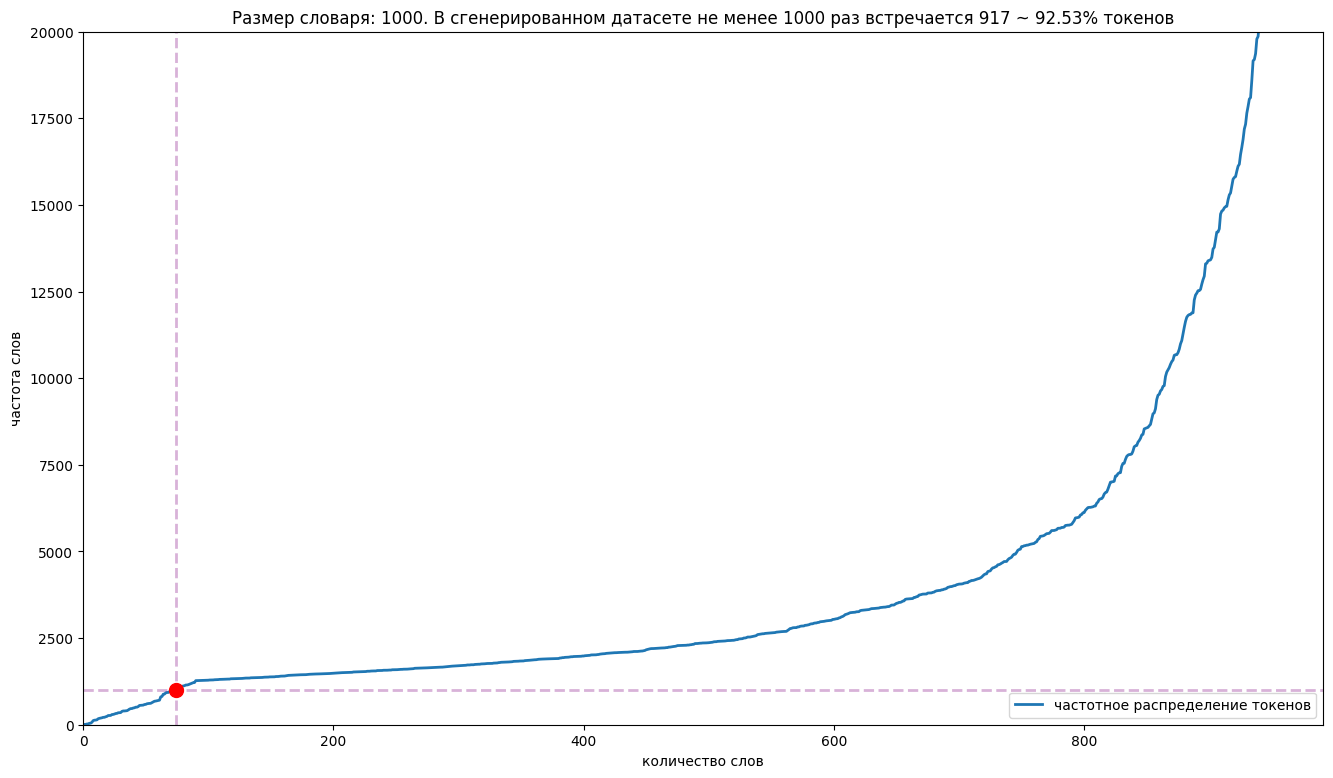

In [71]:
paths = ['dataset/generated/generated_pushkin.txt', 'dataset/generated/generated_curious_pushkin.txt']
draw_tokens_frequency(paths=paths, vocab_size=1000, ylim=20_000, k=1000, dataset_name='сгенерированном')


## оригинальный датасет - тексты Пушкина

всего токенов: 3009940
среди них уникальных 598


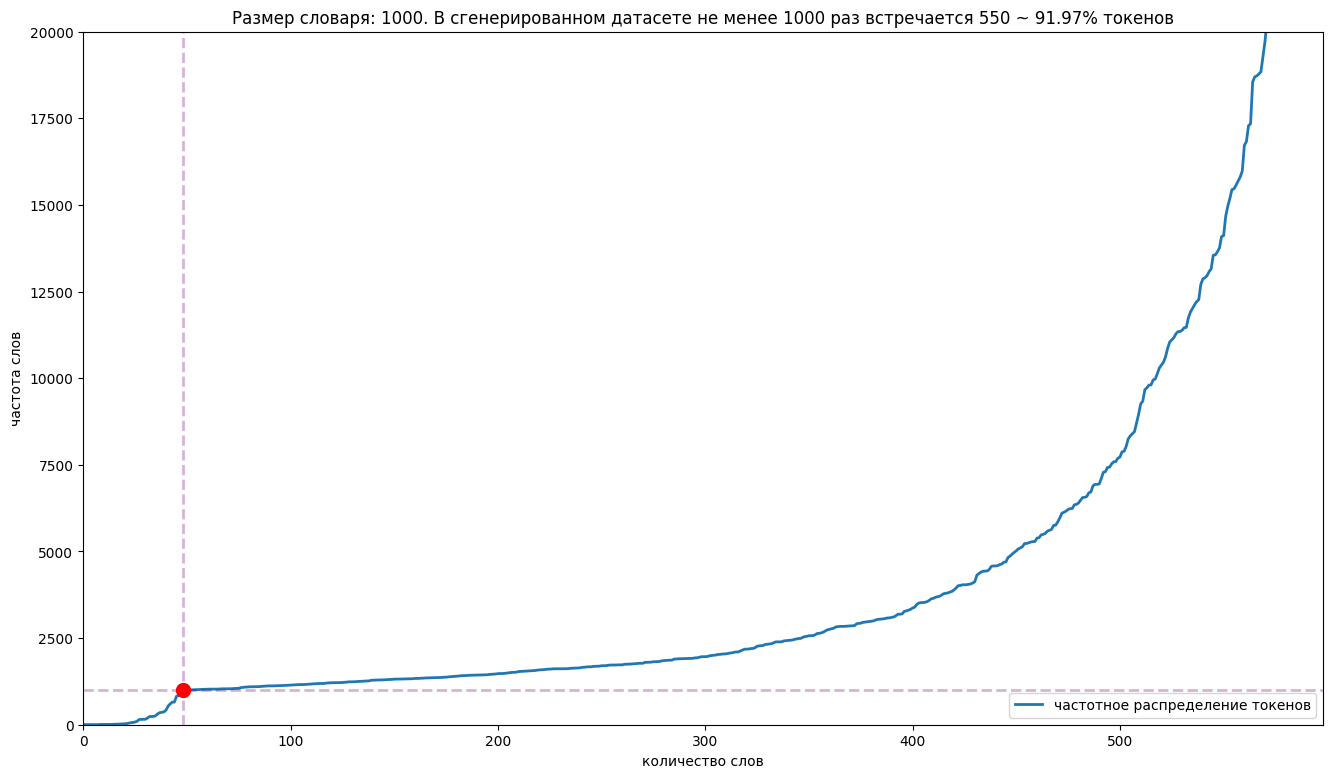

In [72]:
paths = ['dataset/pushkin/cleaned.txt']
draw_tokens_frequency(paths=paths, vocab_size=1000, ylim=20_000, k=1000, dataset_name='сгенерированном')


## сравню частотное распределение токенов в зависимости от размера словаря на сгенерированном датасете

всего токенов: 10699407
среди них уникальных 95


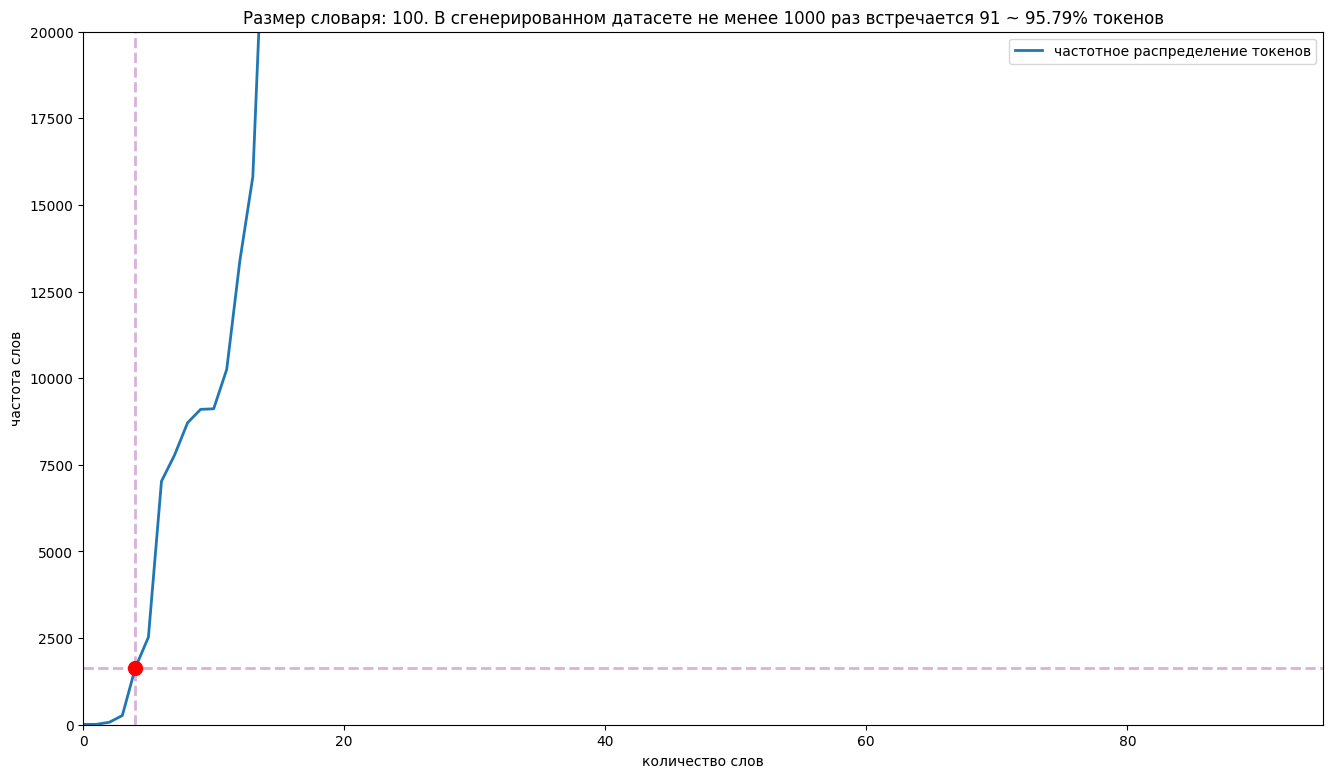

всего токенов: 7337552
среди них уникальных 392


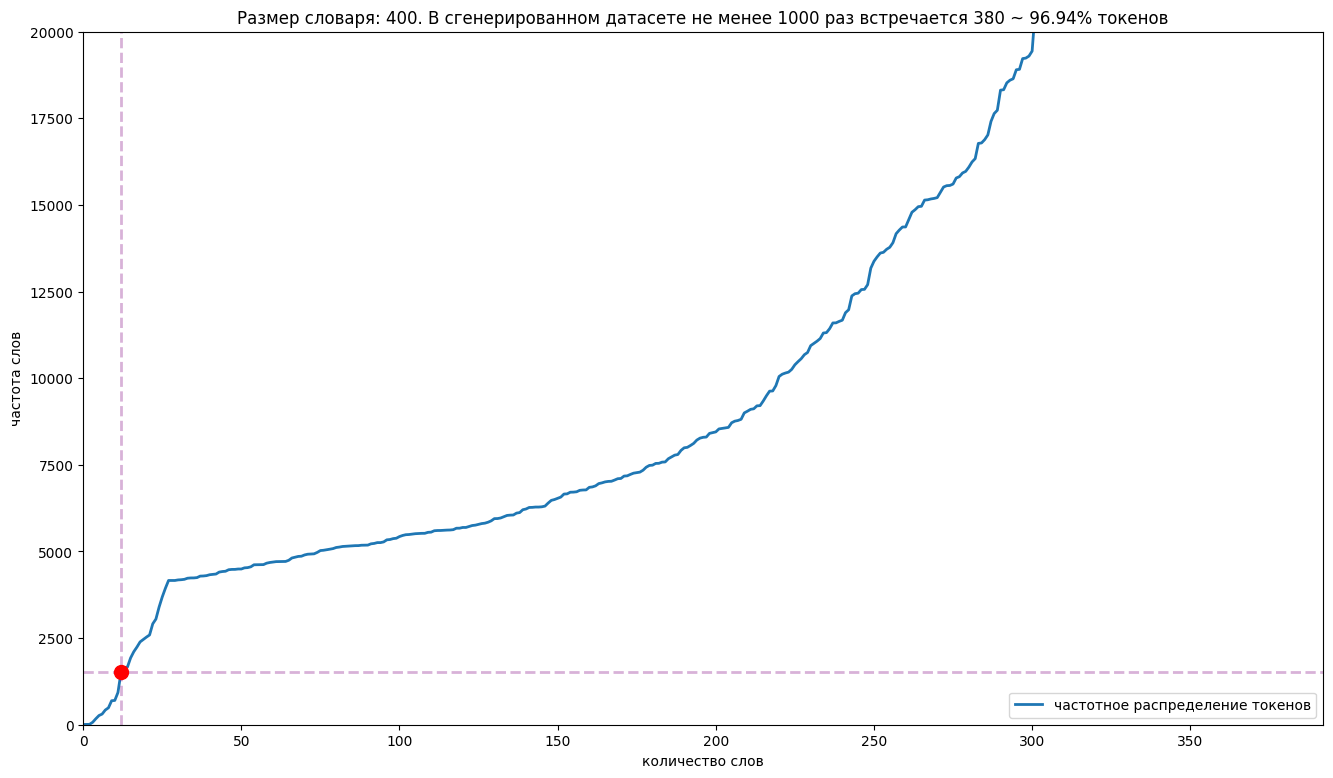

всего токенов: 6467402
среди них уникальных 692


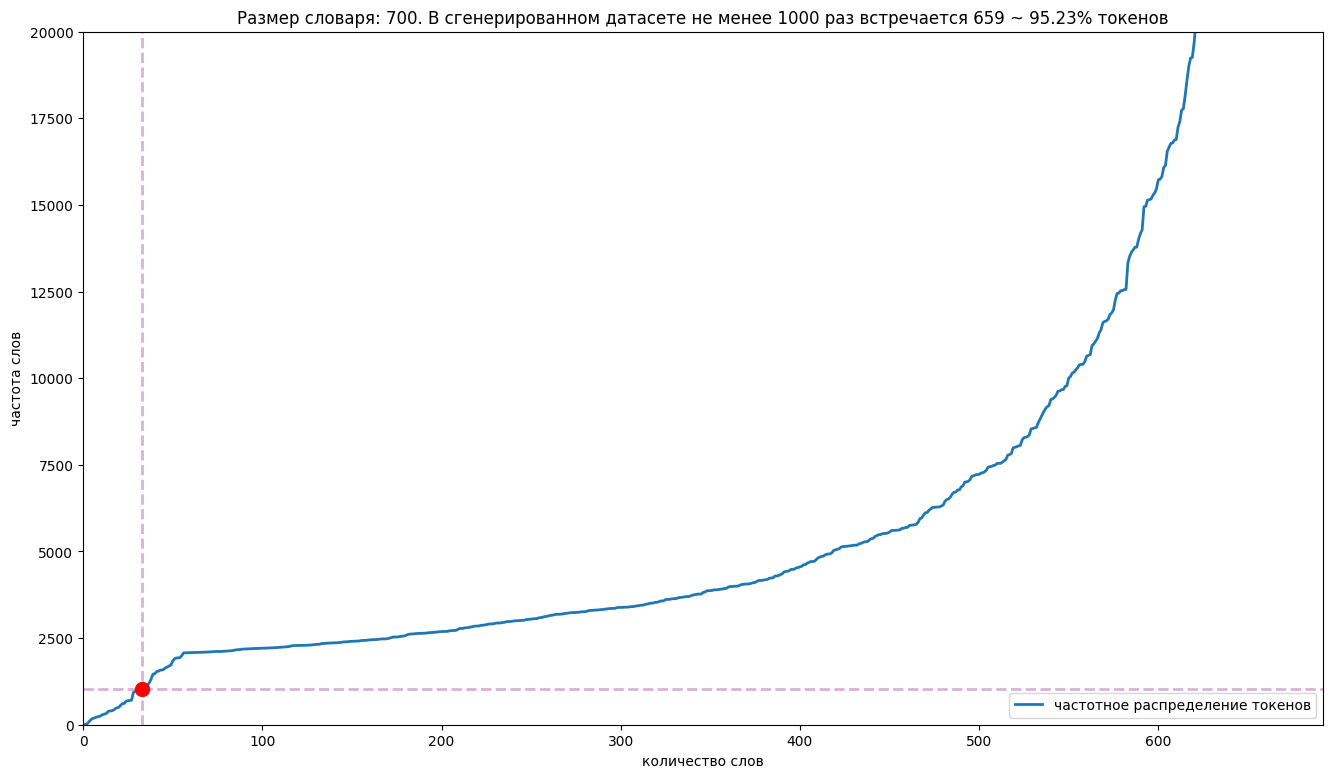

всего токенов: 5979731
среди них уникальных 991


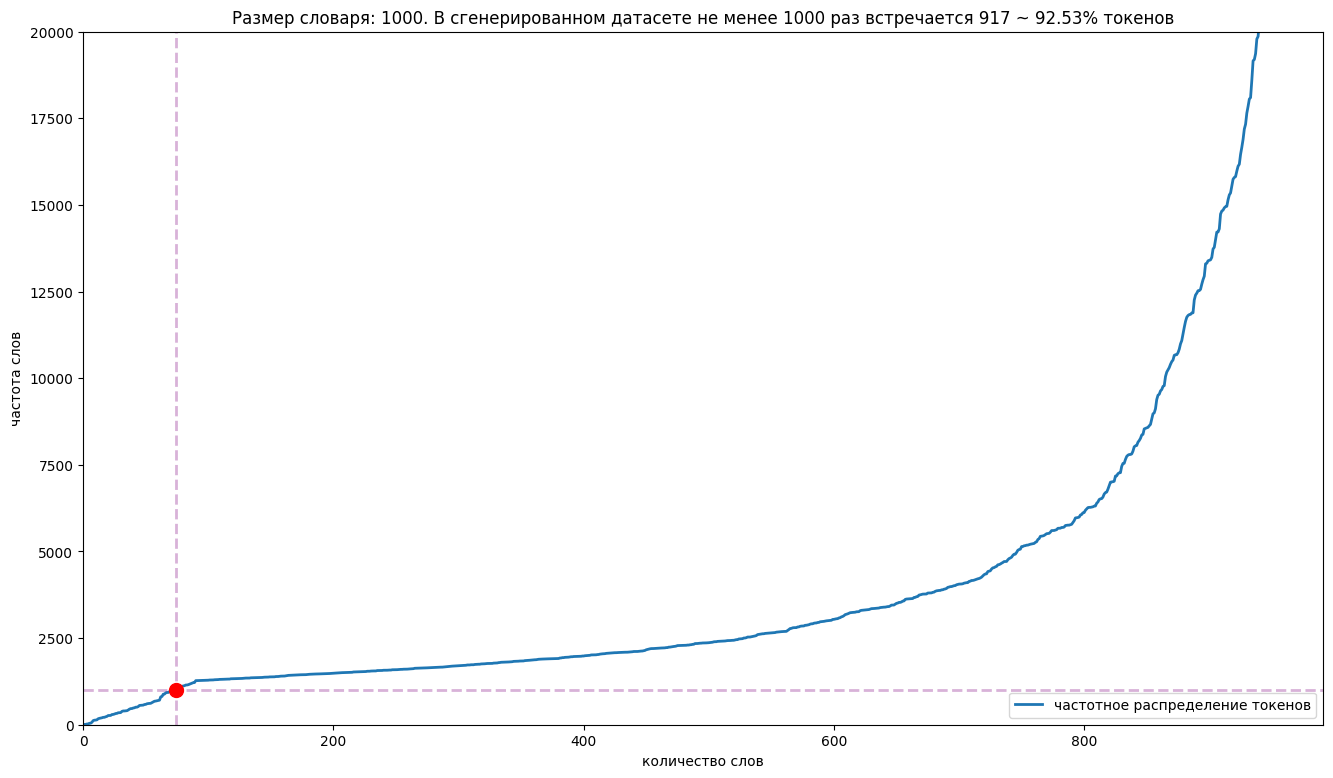

всего токенов: 5761308
среди них уникальных 1186


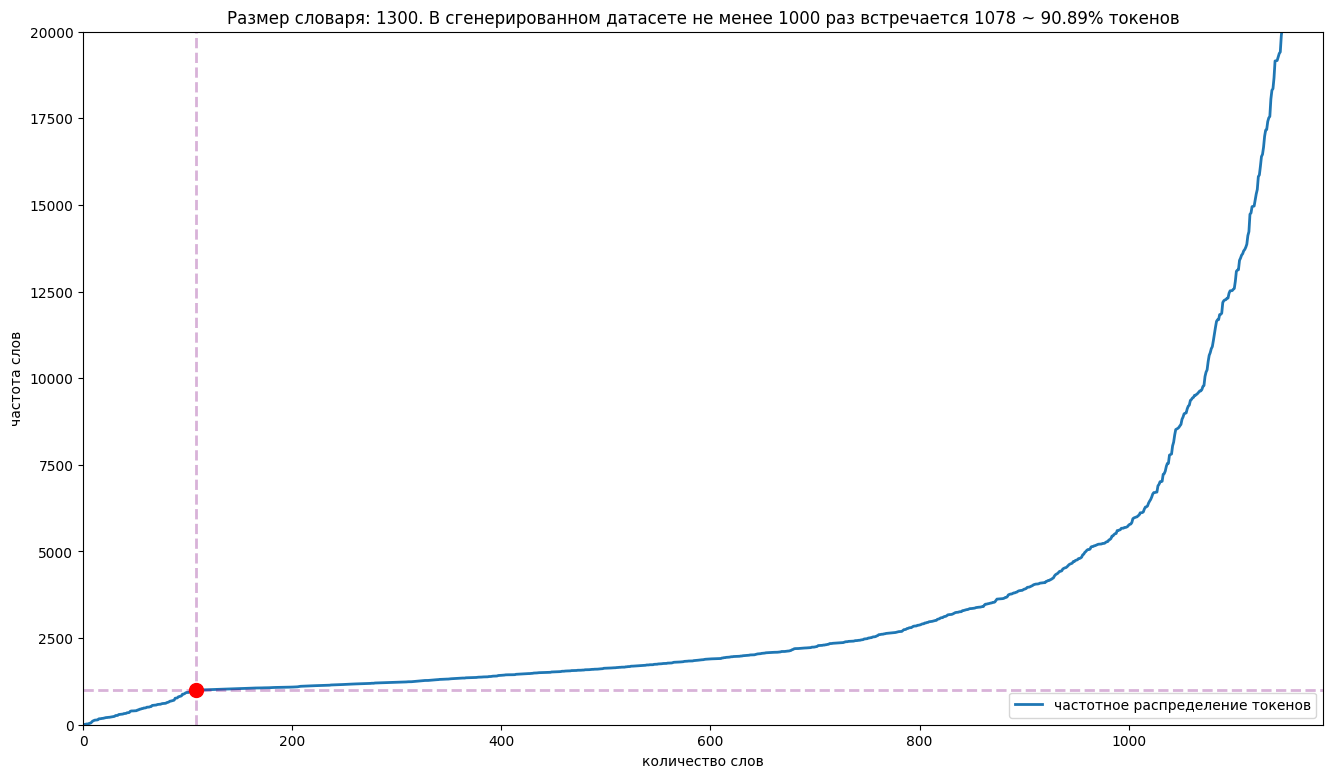

всего токенов: 5761308
среди них уникальных 1186


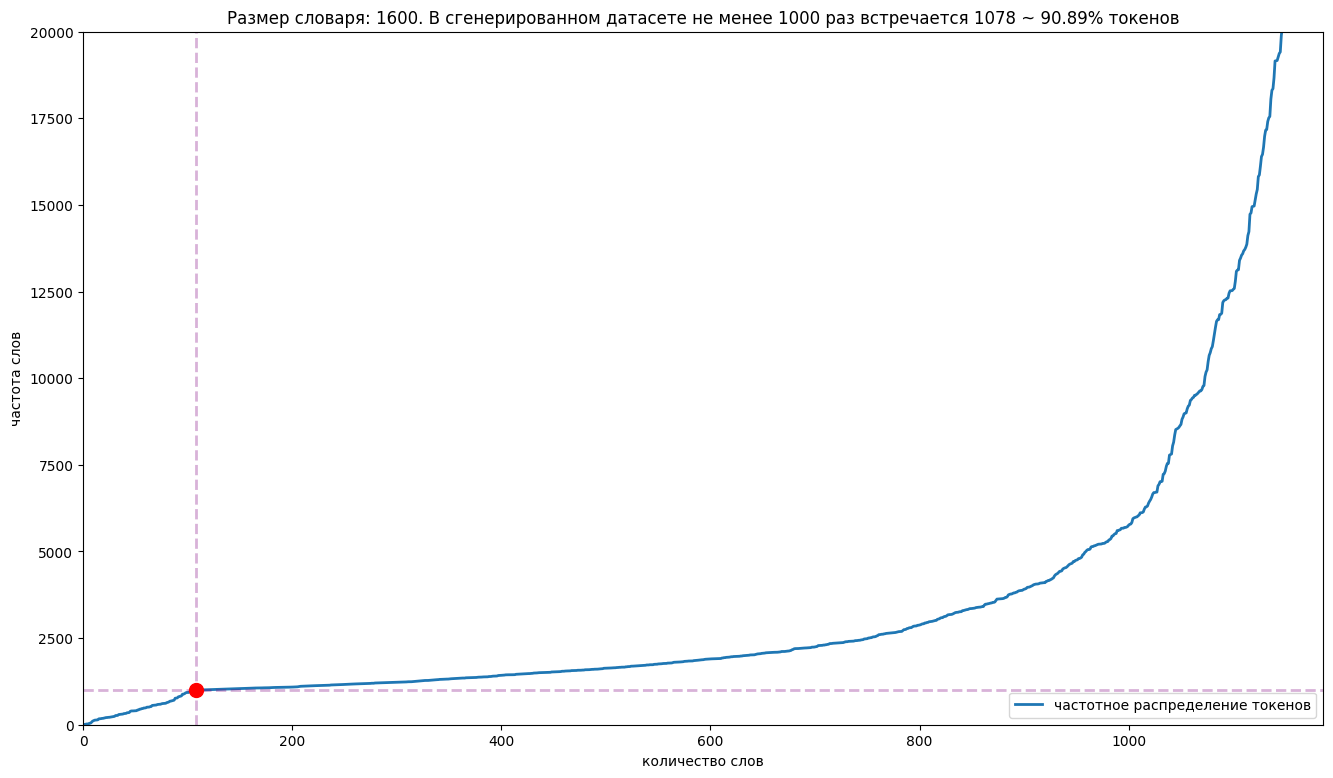

всего токенов: 5761308
среди них уникальных 1186


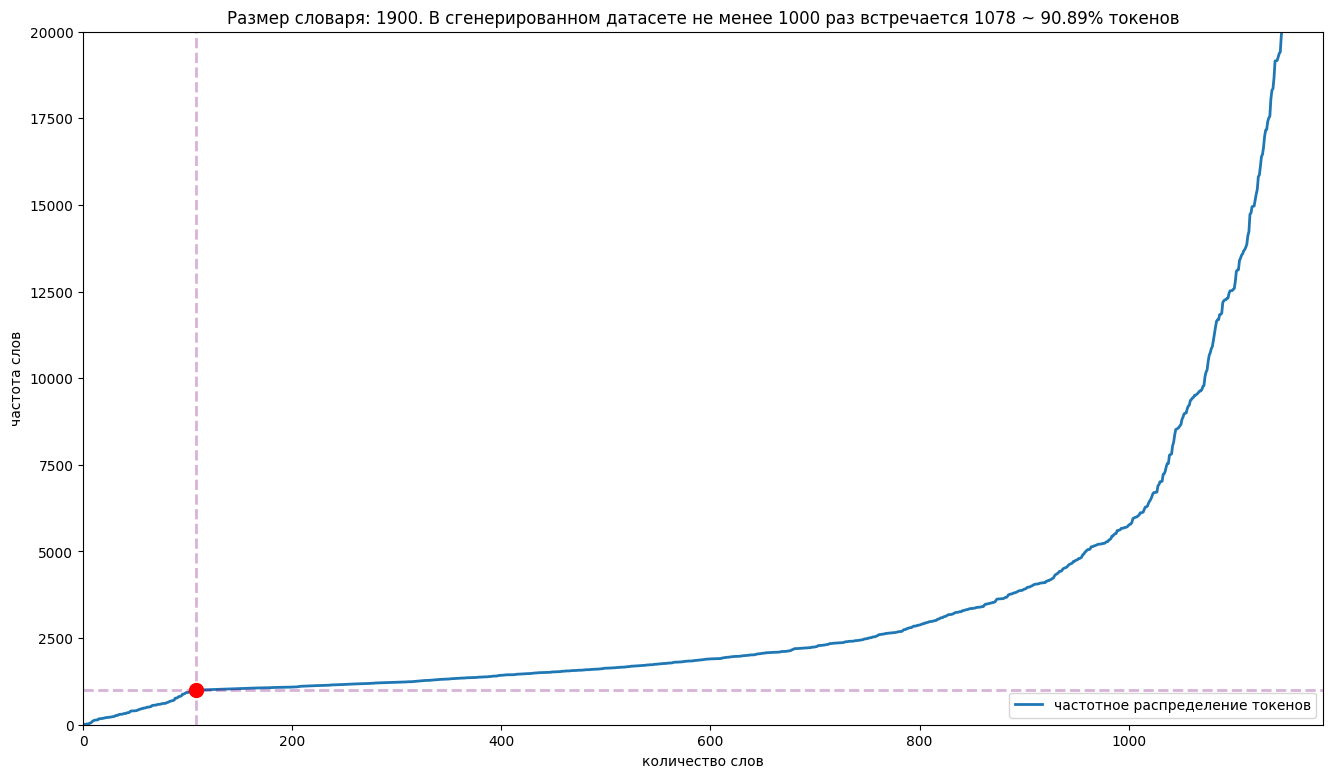

всего токенов: 5761308
среди них уникальных 1186


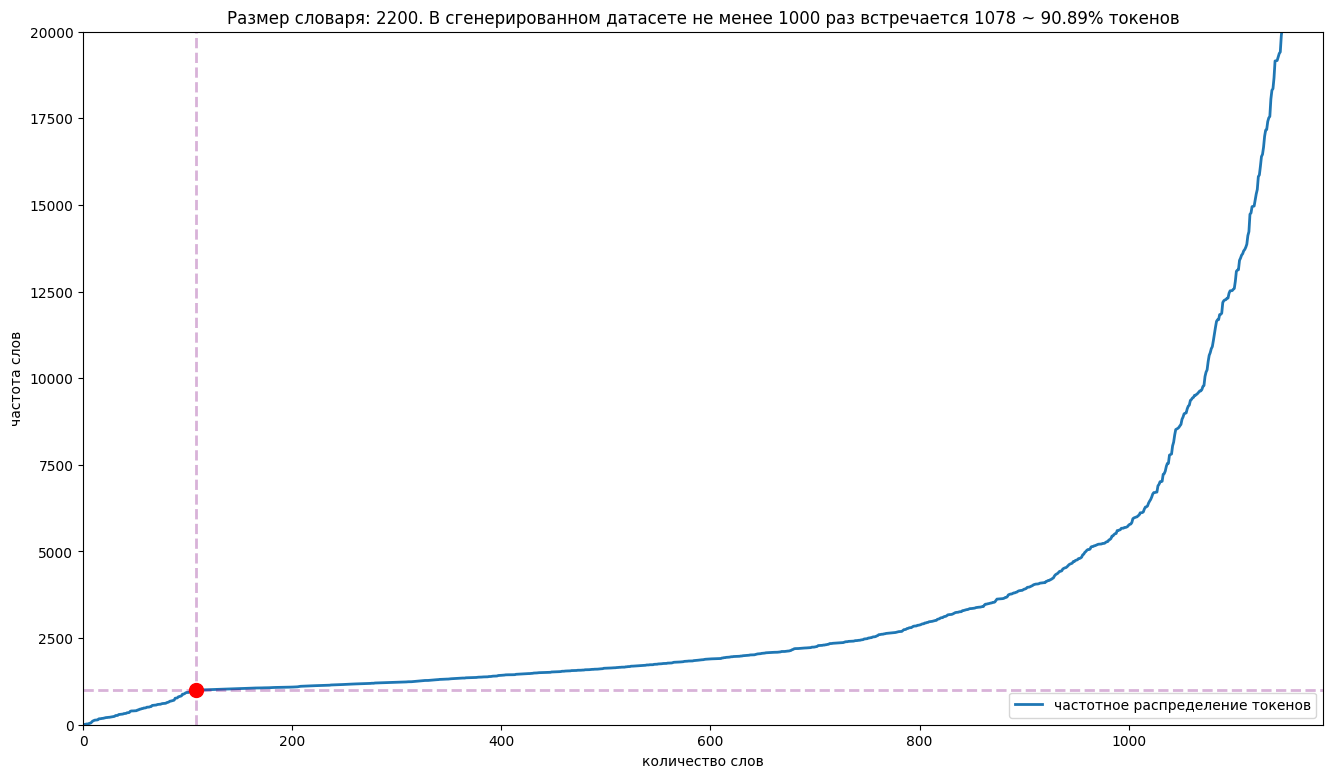

всего токенов: 5761308
среди них уникальных 1186


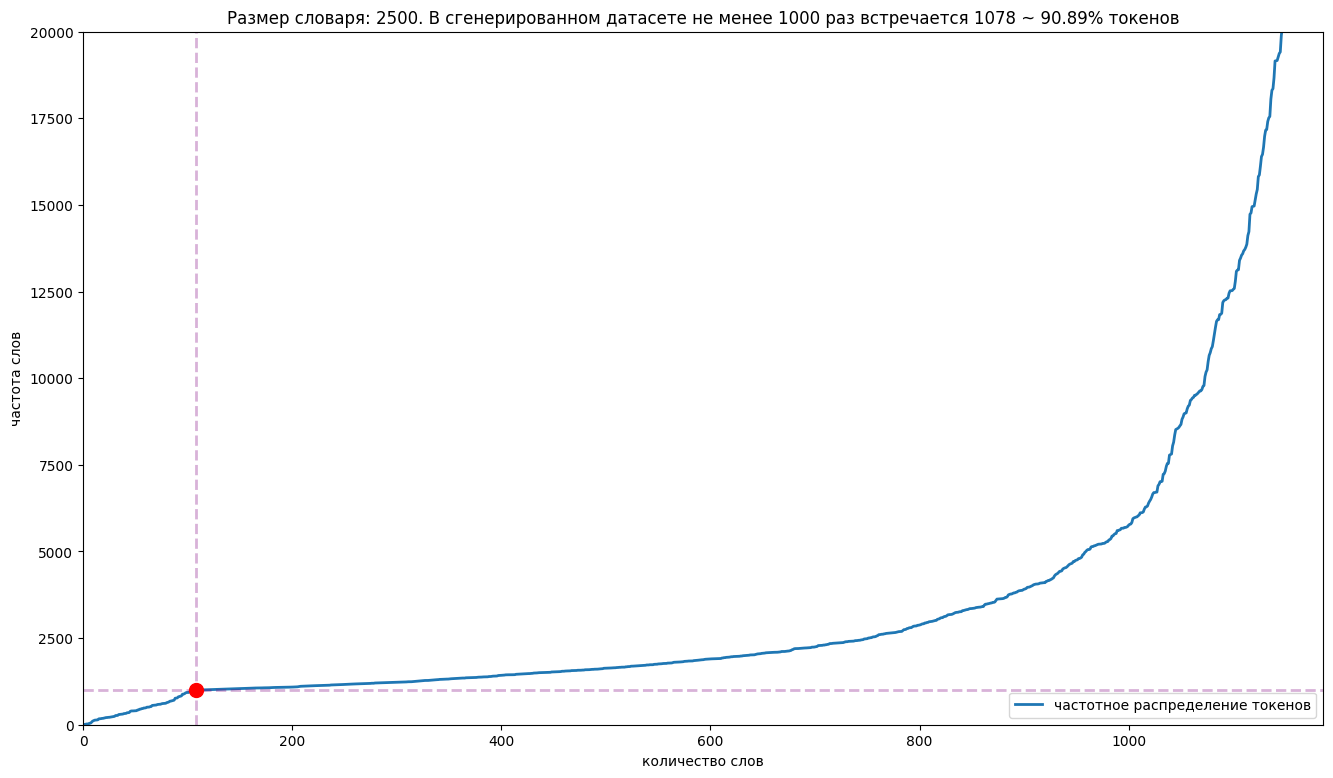

всего токенов: 5761308
среди них уникальных 1186


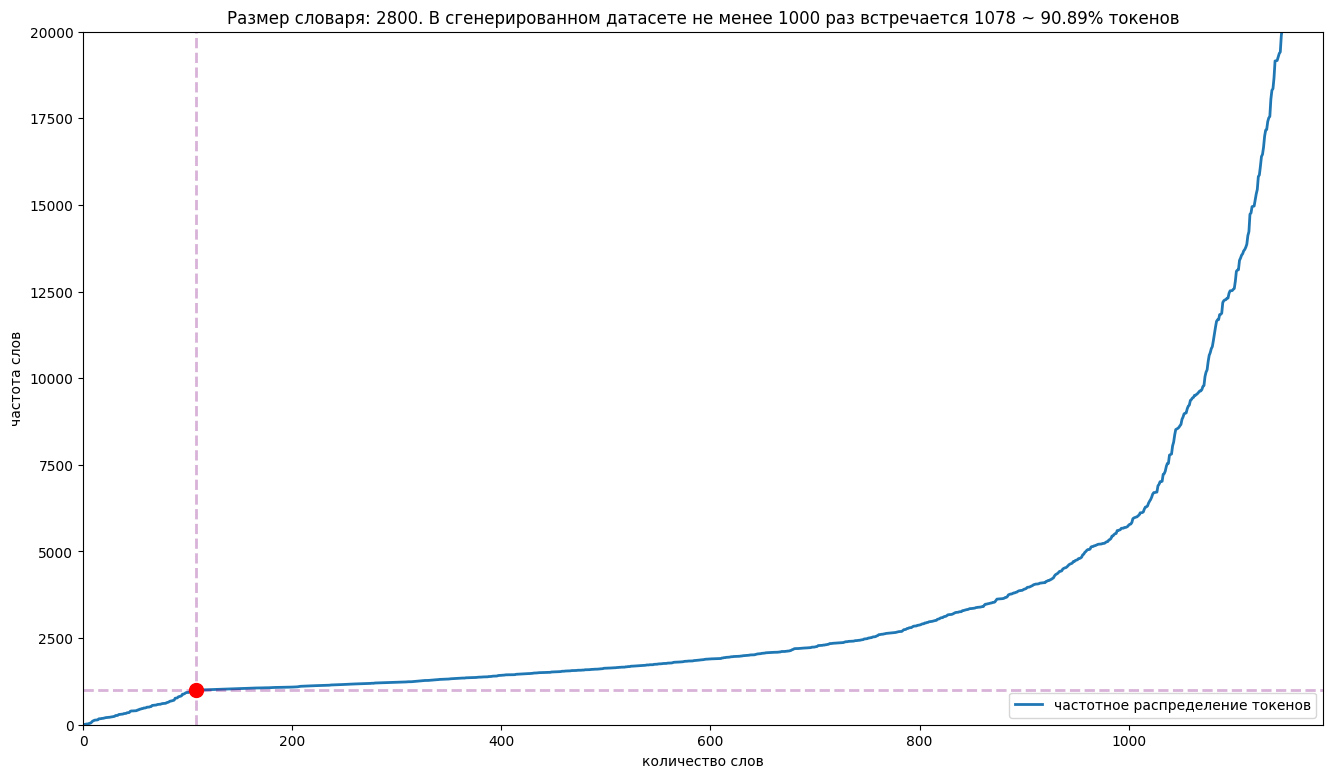

In [73]:
paths = ['dataset/generated/generated_pushkin.txt', 'dataset/generated/generated_curious_pushkin.txt']
for vocab_size in range(100, 3_000, 300):
    draw_tokens_frequency(paths=paths, vocab_size=vocab_size, ylim=20_000, k=1000, dataset_name='сгенерированном')


видно, как с увеличением числа токенов частотность их появления становится все более похожей на частотность появления слов (плохой)

попробую подобрать размер словаря оптимально подходящий для обучения модели

каким должен быть размер словаря?
 - как можно меньше токенов должны встречаться реже условной 1000 раз
 - частототы появления токенов должны быть похожи (не отличаться на порядки)

чтож, порисуем и оценим масштаб проблемы

In [74]:
paths = ['dataset/generated/generated_pushkin.txt', 'dataset/generated/generated_curious_pushkin.txt']


всего токенов: 7841084
среди них уникальных 295


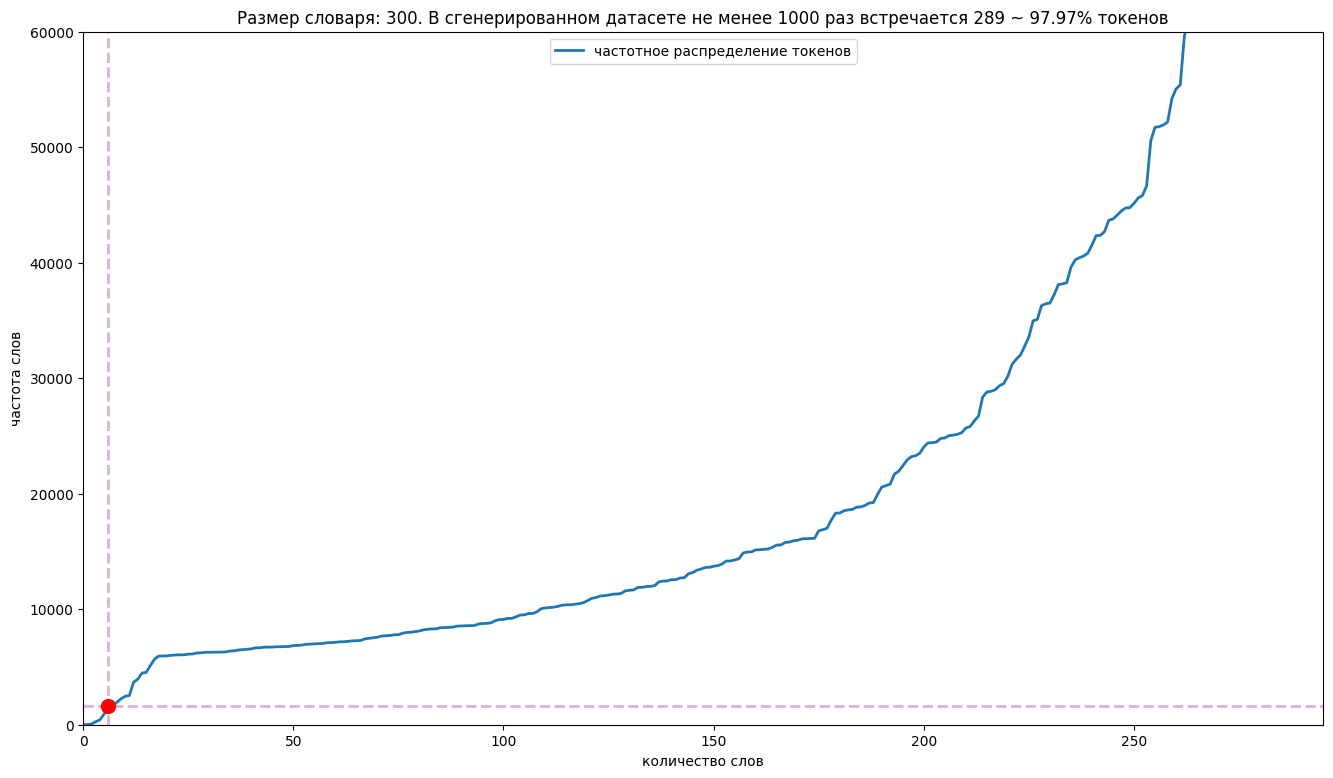

In [75]:
draw_tokens_frequency(paths=paths, vocab_size=300, ylim=60_000, k=1000, dataset_name='сгенерированном')


всего токенов: 10699407
среди них уникальных 95


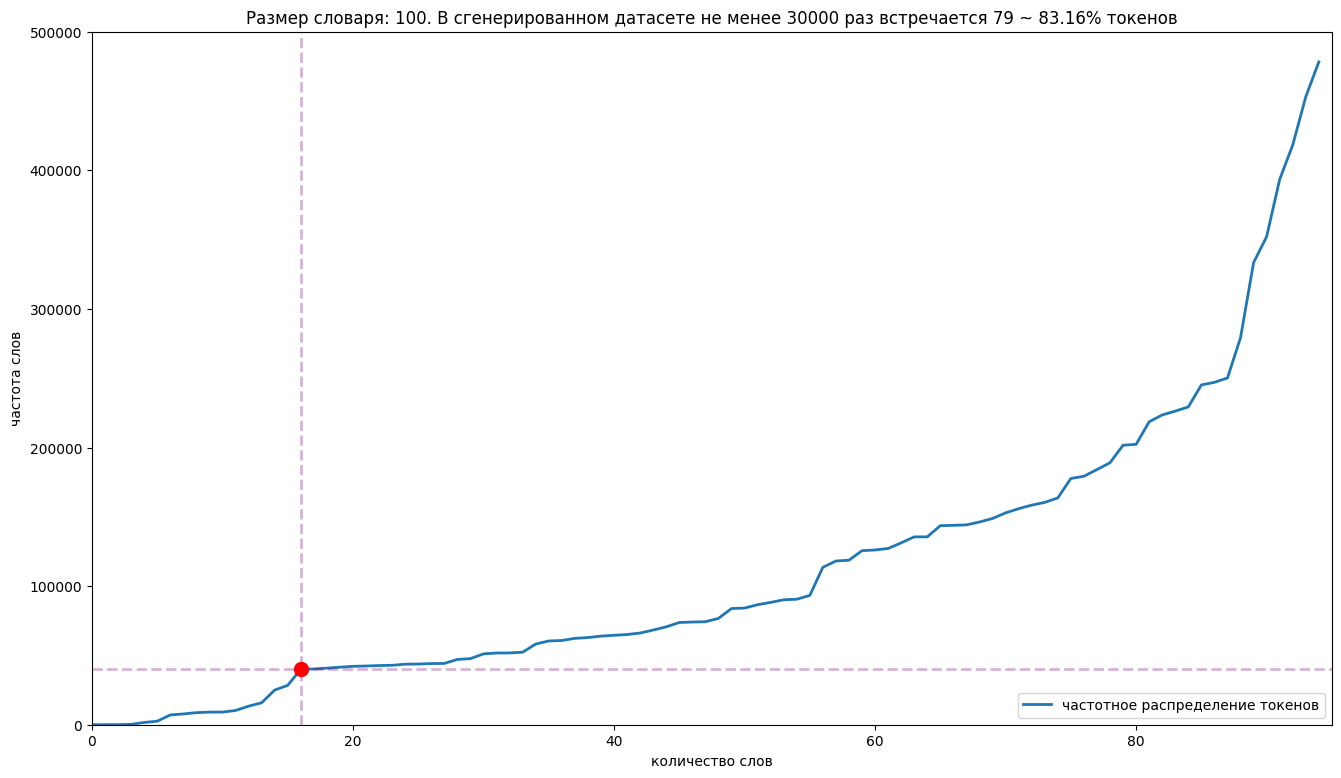

In [77]:
draw_tokens_frequency(paths=paths, vocab_size=100, ylim=500_000, k=30_000, dataset_name='сгенерированном')
